Resolución de Preguntas
Pregunta 1: Intervalo de confianza del 95%
Media muestral (𝑥): Usamos los datos de los pesos proporcionados:

In [1]:
import numpy as np

pesos = [5.2, 4.9, 5.5, 5.0, 5.8, 5.3, 5.1, 5.6, 4.7, 5.4, 5.0, 5.7, 
         5.2, 5.1, 5.3, 5.0, 5.6, 5.2, 5.4, 5.5, 5.7, 5.1, 5.8, 5.0, 
         5.3, 5.6, 4.9, 5.5, 5.2]

media_muestral = np.mean(pesos)
print("Media muestral:", media_muestral)

Media muestral: 5.296551724137931


Desviación estándar muestral (𝑠):

In [2]:
desviacion_estandar = np.std(pesos, ddof=1)
print("Desviación estándar:", desviacion_estandar)

Desviación estándar: 0.29457324898024645


Cálculo del intervalo de confianza: Fórmula del intervalo de confianza:
x+t * 8 /√n

Donde:
t: Valor crítico (2.048 para n−1=28 grados de libertad y 95% de confianza).
s: Desviación estándar muestral.
n: Tamaño de la muestra (29)

In [3]:
from scipy.stats import t

n = len(pesos)
t_critico = t.ppf(0.975, df=n-1)  # Nivel de confianza de 95%
margen_error = t_critico * (desviacion_estandar / np.sqrt(n))

intervalo_inferior = media_muestral - margen_error
intervalo_superior = media_muestral + margen_error

print("Intervalo de confianza:", (intervalo_inferior, intervalo_superior))

Intervalo de confianza: (5.184502052753028, 5.408601395522834)


Pregunta 2: Contraste de hipótesis

Hipótesis:
  H0  El peso promedio es igual a 1.5 kg u = 1.5
    Hipótesis:
  H1  El peso promedio es menor a 1.5 kg u < 1.5

  Cálculo del estadístico de prueba 
t: Fórmula:

donde:
𝑥 =1.48,μ=1.5, s=0.1, n=50

In [4]:
x_bar = 1.48
mu = 1.5
s = 0.1
n = 50

t_estadistico = (x_bar - mu) / (s / np.sqrt(n))
print("Estadístico de prueba t:", t_estadistico)

Estadístico de prueba t: -1.4142135623730963


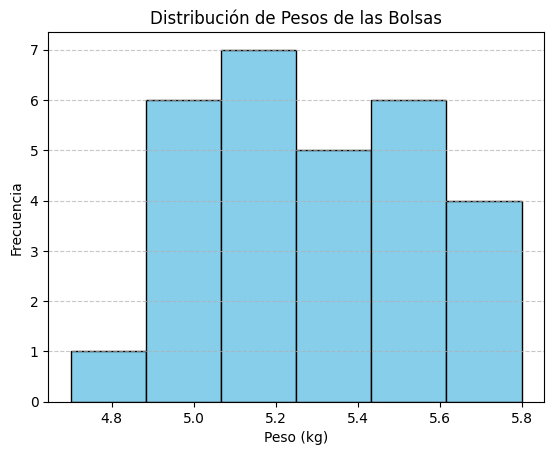

In [5]:
import matplotlib.pyplot as plt

# Datos
pesos = [5.2, 4.9, 5.5, 5.0, 5.8, 5.3, 5.1, 5.6, 4.7, 5.4, 5.0, 5.7, 5.2, 
         5.1, 5.3, 5.0, 5.6, 5.2, 5.4, 5.5, 5.7, 5.1, 5.8, 5.0, 5.3, 5.6, 
         4.9, 5.5, 5.2]

# Grafico de Frecuencias
plt.hist(pesos, bins=6, color='skyblue', edgecolor='black')
plt.title('Distribución de Pesos de las Bolsas')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
import pandas as pd

# Crear un DataFrame
df = pd.DataFrame({'Pesos': pesos})

# Calcular estadísticas descriptivas
tabla_resumen = df.describe()

# Mostrar la tabla
print(tabla_resumen)

           Pesos
count  29.000000
mean    5.296552
std     0.294573
min     4.700000
25%     5.100000
50%     5.300000
75%     5.500000
max     5.800000


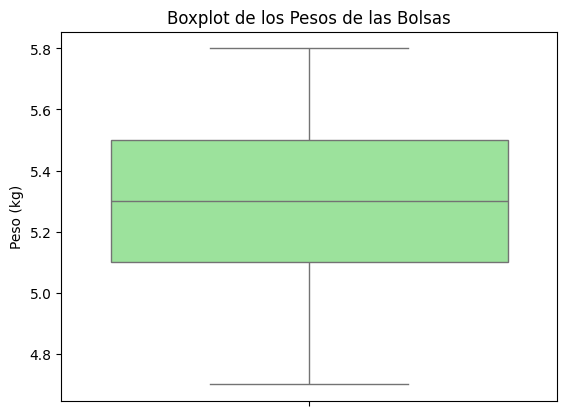

In [7]:
import seaborn as sns

# Gráfico de caja
sns.boxplot(data=pesos, color='lightgreen')
plt.title('Boxplot de los Pesos de las Bolsas')
plt.ylabel('Peso (kg)')
plt.show()

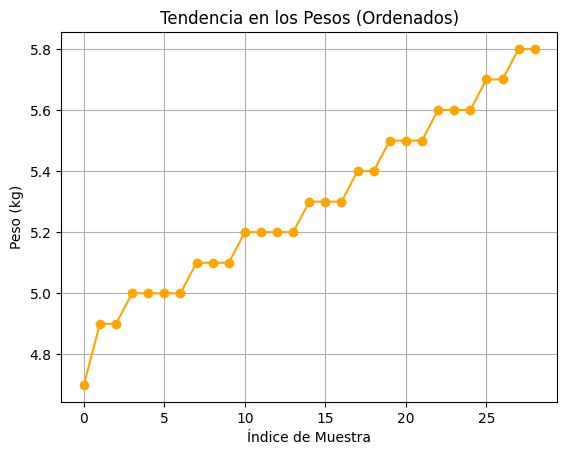

In [8]:
pesos_ordenados = sorted(pesos)
plt.plot(pesos_ordenados, marker='o', linestyle='-', color='orange')
plt.title('Tendencia en los Pesos (Ordenados)')
plt.xlabel('Índice de Muestra')
plt.ylabel('Peso (kg)')
plt.grid()
plt.show()

In [9]:
from scipy.stats import t

# Parámetros
n = len(pesos)
media_muestral = sum(pesos) / n
desviacion_estandar_muestral = (sum((x - media_muestral)**2 for x in pesos) / (n - 1))**0.5
t_critico = t.ppf(0.975, df=n-1)  # Para un intervalo del 95%

# Intervalo de confianza
margen_error = t_critico * (desviacion_estandar_muestral / (n**0.5))
intervalo = (media_muestral - margen_error, media_muestral + margen_error)

# Crear tabla con pandas
tabla_ic = pd.DataFrame({
    'Estadística': ['Media', 'Desviación estándar', 'Límite inferior IC', 'Límite superior IC'],
    'Valor': [media_muestral, desviacion_estandar_muestral, intervalo[0], intervalo[1]]
})

# Mostrar tabla
print(tabla_ic)

           Estadística     Valor
0                Media  5.296552
1  Desviación estándar  0.294573
2   Límite inferior IC  5.184502
3   Límite superior IC  5.408601
